In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from pandas import DataFrame

In [4]:
df = pd.read_csv('\\ML_Hospitability\Data\Data-final.csv')
print(df)

      P_RADIUS_EST   P_MASS_EST  P_SEMI_MAJOR_AXIS_EST     P_PERIOD  \
0        12.082709  6165.863300                1.29000   326.030000   
1        12.229641  4684.784800                1.53000   516.219970   
2        12.848516  1525.574400                0.83000   185.840000   
3        12.865261  1481.078500                2.93000  1773.400000   
4        13.421749   565.733850                1.66000   798.500000   
...            ...          ...                    ...          ...   
2908      1.870000     4.155456                0.13456    28.165600   
2909      2.760000     8.047485                0.05769     7.906961   
2910      1.102775     1.380000                0.02100     3.204000   
2911      1.178333     1.750000                0.03500     6.689000   
2912      1.164989     1.680000                0.05400    13.031000   

          P_FLUX  P_TEMP_EQUIL  S_MASS   S_RADIUS  S_TEMPERATURE  \
0     101.011410     799.44963    2.70  19.000000         4742.0   
1     107.3

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:,12]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [7]:
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
cr = classification_report(y_test, y_pred)
print("Classification Report:",)
print (cr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion Matrix:
[[850   0]
 [  3  21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       850
           1       1.00      0.88      0.93        24

    accuracy                           1.00       874
   macro avg       1.00      0.94      0.97       874
weighted avg       1.00      1.00      1.00       874

Accuracy: 99.66%


Confusion Matrix:
[[850   0]
 [  3  21]]
Accuracy: 99.66%
Feature: 0, Score: 0.61938
Feature: 1, Score: 0.01171
Feature: 2, Score: 0.01801
Feature: 3, Score: 0.02580
Feature: 4, Score: 0.11229
Feature: 5, Score: 0.03833
Feature: 6, Score: 0.00092
Feature: 7, Score: 0.13361
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.03995
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000


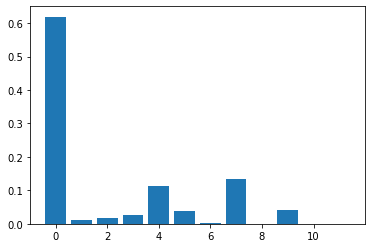

In [10]:
from matplotlib import pyplot
print("Confusion Matrix:")
print(result)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()